In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import or_, and_
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
recent_date.date

'2017-08-23'

### Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [10]:
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(query_date)

2016-08-23


In [32]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date,Measurement.prcp).\
    filter(and_(Measurement.date>=query_date,Measurement.prcp!="None")).order_by(Measurement.date)

In [36]:
Precipitation_list = [result[0] for result in results]
Date_list = [result[1] for result in results]

In [34]:
zipbObj = zip(Precipitation_list, Date_list)
dictOfPrecip = dict(zipbObj)
dictOfPrecip

{'2016-08-23': 0.7,
 '2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.01,
 '2016-08-27': 0.12,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.05,
 '2016-08-31': 2.46,
 '2016-09-01': 0.01,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 1.0,
 '2016-09-07': 1.35,
 '2016-09-08': 0.15,
 '2016-09-09': 0.35,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 1.04,
 '2016-09-13': 1.2,
 '2016-09-14': 6.7,
 '2016-09-15': 3.35,
 '2016-09-16': 0.61,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 1.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.33,
 '2016-09-24': 0.27,
 '2016-09-25': 0.04,
 '2016-09-26': 1.02,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 1.49,
 '2016-09-30': 0.38,
 '2016-10-01': 1.02,
 '2016-10-02': 0.61,
 '2016-10-03': 0.46,
 '2016-10-04': 3.46,
 '2016-10-05': 0.81,
 '2016-10-06': 0.04,
 '2016-10-07': 0.01,
 '2016-10-08': 0.04,
 '2016-10-09': 0.0,
 

In [14]:
df = pd.DataFrame(results, columns=['Date','Precipitation'])

# Sort the dataframe by date
df=df.sort_values(by=['Date'])

# set the dataframe index to date
df.set_index(df['Date'], inplace=True)
df

,Date,Precipitation
Date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,0.02
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.70
2016-08-23,2016-08-23,0.15
...,...,...
2017-08-22,2017-08-22,0.50
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.08


In [15]:
###Plot the results using the DataFrame `plot` method.

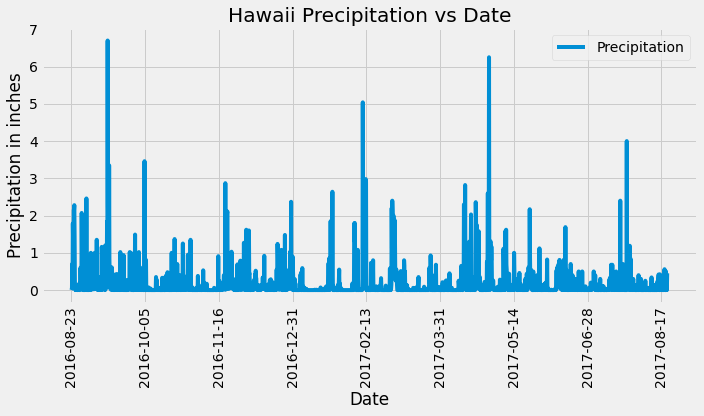

In [16]:
df.plot(x='Date',y='Precipitation',figsize = (10,6), rot=90)
plt.title('Hawaii Precipitation vs Date')
plt.ylabel('Precipitation in inches')
plt.xlabel('Date')
#plt.locator_params(axis='x', nbins=9)
plt.tight_layout()
plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(df.Precipitation.describe())

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Measurement.station).distinct().count()
print(total_stations)

9


In [43]:
stations = session.query(Station.name).distinct().all()
print(stations)

[('WAIKIKI 717.2, HI US',), ('KANEOHE 838.1, HI US',), ('KUALOA RANCH HEADQUARTERS 886.9, HI US',), ('PEARL CITY, HI US',), ('UPPER WAHIAWA 874.3, HI US',), ('WAIMANALO EXPERIMENTAL FARM, HI US',), ('WAIHEE 837.5, HI US',), ('HONOLULU OBSERVATORY 702.2, HI US',), ('MANOA LYON ARBO 785.2, HI US',)]


In [56]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
print(active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [57]:
active_station1 = session.query(Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()
print(active_station1)

('USC00519281',)


In [62]:
active1_tobs = session.query(Measurement.date,Measurement.tobs).\
    filter(and_(Measurement.station=='USC00519281',Measurement.date>="2016-08-23")).\
    order_by((Measurement.date).desc()).all()
print(active1_tobs)

[('2017-08-18', 79.0), ('2017-08-17', 76.0), ('2017-08-16', 76.0), ('2017-08-15', 77.0), ('2017-08-14', 77.0), ('2017-08-13', 77.0), ('2017-08-06', 83.0), ('2017-08-05', 82.0), ('2017-08-04', 77.0), ('2017-07-31', 76.0), ('2017-07-30', 81.0), ('2017-07-29', 82.0), ('2017-07-28', 81.0), ('2017-07-27', 76.0), ('2017-07-26', 75.0), ('2017-07-25', 77.0), ('2017-07-24', 75.0), ('2017-07-23', 82.0), ('2017-07-22', 77.0), ('2017-07-21', 77.0), ('2017-07-20', 77.0), ('2017-07-19', 76.0), ('2017-07-18', 76.0), ('2017-07-17', 76.0), ('2017-07-16', 80.0), ('2017-07-15', 80.0), ('2017-07-14', 76.0), ('2017-07-13', 74.0), ('2017-07-12', 74.0), ('2017-07-11', 72.0), ('2017-07-10', 69.0), ('2017-07-09', 78.0), ('2017-07-08', 78.0), ('2017-07-07', 75.0), ('2017-07-06', 74.0), ('2017-07-05', 77.0), ('2017-07-04', 78.0), ('2017-07-03', 76.0), ('2017-07-02', 81.0), ('2017-07-01', 79.0), ('2017-06-30', 76.0), ('2017-06-29', 76.0), ('2017-06-28', 77.0), ('2017-06-27', 76.0), ('2017-06-26', 73.0), ('2017-06

In [71]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
maxtobs = session.query(func.max(Measurement.tobs).label('maxtobs')).filter(Measurement.station=='USC00519281').all()
maxtobs

[(85.0,)]

In [69]:
mintobs = session.query(func.min(Measurement.tobs).label('mintobs')).filter(Measurement.station=='USC00519281').all()
mintobs

[(54.0,)]

In [23]:
avgtobs = session.query(func.avg(Measurement.tobs).label('mintobs')).filter(Measurement.station=='USC00519281').all
avgtobs

[(71.66378066378067,)]

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.date,Measurement.tobs).\
    filter(and_(Measurement.date>=query_date,Measurement.tobs!="None",Measurement.tobs>=0,Measurement.station=='USC00519281')).distinct()
results.order_by(Measurement.date).count()

352

In [25]:
date_list = [result[0] for result in results]
tobs_list = [result[1] for result in results]
#print(Date_list,Precipitation_list)

In [26]:
df = pd.DataFrame(results, columns=['Date','Temperature'])

# Sort the dataframe by date
df=df.sort_values(by=['Date'])

# set the dataframe index to date
df.set_index(df['Date'], inplace=True)
df

,Date,Temperature
Date,,
2016-08-23,2016-08-23,77.0
2016-08-24,2016-08-24,77.0
2016-08-25,2016-08-25,80.0
2016-08-26,2016-08-26,80.0
2016-08-27,2016-08-27,75.0
...,...,...
2017-08-14,2017-08-14,77.0
2017-08-15,2017-08-15,77.0
2017-08-16,2017-08-16,76.0


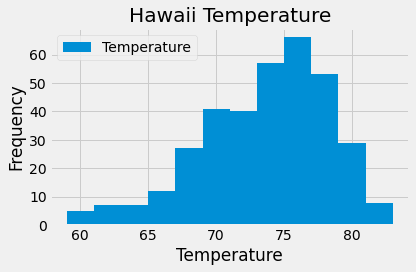

In [27]:
df.plot.hist(by='Temperature',bins=12)
plt.title('Hawaii Temperature')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.tight_layout()
plt.show()

# Close session

In [28]:
# Close Session
session.close()